In [1]:
import scanpy

In [13]:
adata = scanpy.read_10x_mtx('./Downloads/GSE131059_RAW/Naivebm/', cache_compression=None)

In [14]:
adata

AnnData object with n_obs × n_vars = 6458 × 27998
    var: 'gene_ids'

In [3]:
scanpy.pp.calculate_qc_metrics (adata)

(                    n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
 AAACCTGAGATGTCGG-1                433                 6.073045         739.0   
 AAACCTGCACCTGGTG-1                482                 6.180017         753.0   
 AAACCTGCATCTCGCT-1                686                 6.532334        1091.0   
 AAACCTGCATGAACCT-1                760                 6.634633        1331.0   
 AAACCTGGTACATGTC-1                544                 6.300786         917.0   
 ...                               ...                      ...           ...   
 TTTGTCAGTCGGCATC-1                282                 5.645447         748.0   
 TTTGTCAGTCTAGGTT-1                871                 6.770789        1670.0   
 TTTGTCAGTCTGATCA-1                411                 6.021023        1134.0   
 TTTGTCAGTGCACTTA-1                425                 6.054439         637.0   
 TTTGTCATCGTAGATC-1                740                 6.608001        1361.0   
 
                     log1p

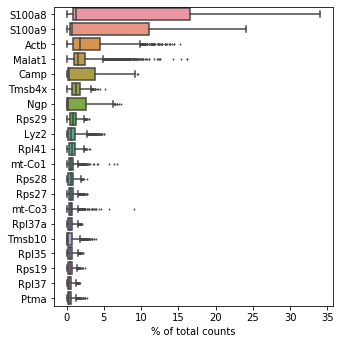

In [4]:
scanpy.pl.highest_expr_genes(adata, n_top=20, )

In [5]:
scanpy.pp.filter_cells(adata, min_genes=200)
scanpy.pp.filter_genes(adata, min_cells=3)

In [17]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
adata.var['ribo']=adata.var_names.str.startswith('Rpl','Rps')
scanpy.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)

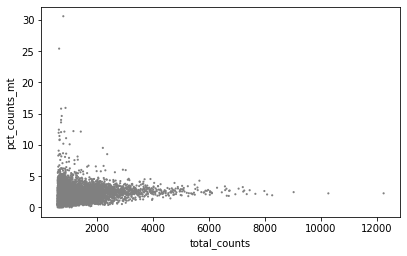

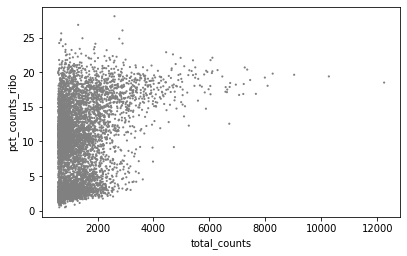

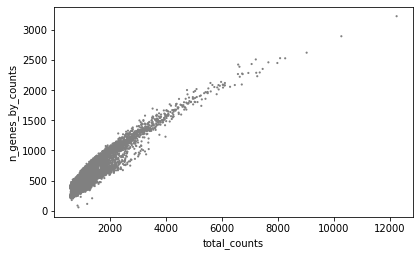

In [18]:
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
scanpy.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
scanpy.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')